In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

from scipy import signal

from kid_readout.measurement.io import npy
from kid_readout.measurement import plot_basic
from kid_readout.analysis import detect_peaks
from kid_readout.analysis.resonator import find_resonators, lmfit_resonator

In [2]:
plot_directory = '/home/flanigan/temp/'

In [3]:
npd = npy.NumpyDirectory('/data/readout/2017-11-16_155442_scan.npd/')

In [4]:
npd.node_names()

['Scan0',
 'ADCSnap1',
 'ADCSnap2',
 'ADCSnap3',
 'ADCSnap4',
 'ADCSnap5',
 'ADCSnap6',
 'ADCSnap7',
 'ADCSnap8',
 'ADCSnap9',
 'ADCSnap10',
 'ADCSnap11',
 'ADCSnap12',
 'ADCSnap13']

# ADCSnap

In [5]:
snaps = [npd.read(name) for name in npd.node_names() if name.startswith('ADCSnap')]

In [6]:
[(snap.x.ptp(), snap.y.ptp()) for snap in snaps]

[(11.0, 17.0),
 (9.0, 15.0),
 (9.0, 16.0),
 (11.0, 15.0),
 (10.0, 17.0),
 (9.0, 21.0),
 (9.0, 22.0),
 (10.0, 21.0),
 (10.0, 20.0),
 (11.0, 19.0),
 (10.0, 16.0),
 (9.0, 19.0),
 (9.0, 19.0)]

In [7]:
[(snap.x.std(), snap.y.std()) for snap in snaps]

[(1.3503359261872927, 2.8076993767691558),
 (1.3758653172072295, 2.489654066498868),
 (1.3376842256037285, 2.3285231153869717),
 (1.3819769797443571, 2.5206278344140078),
 (1.3372007721565224, 3.1167637051725987),
 (1.3413486759402931, 4.395763607587039),
 (1.3605502080096179, 4.6863112913342739),
 (1.3735041501274496, 3.73953589548326),
 (1.3346847103288917, 3.2539143098545886),
 (1.3492389617802021, 3.0245976945054673),
 (1.3167415384339767, 2.8469203735990103),
 (1.4075879831408737, 3.1793701613374203),
 (1.4017720451764557, 3.90446138250066)]

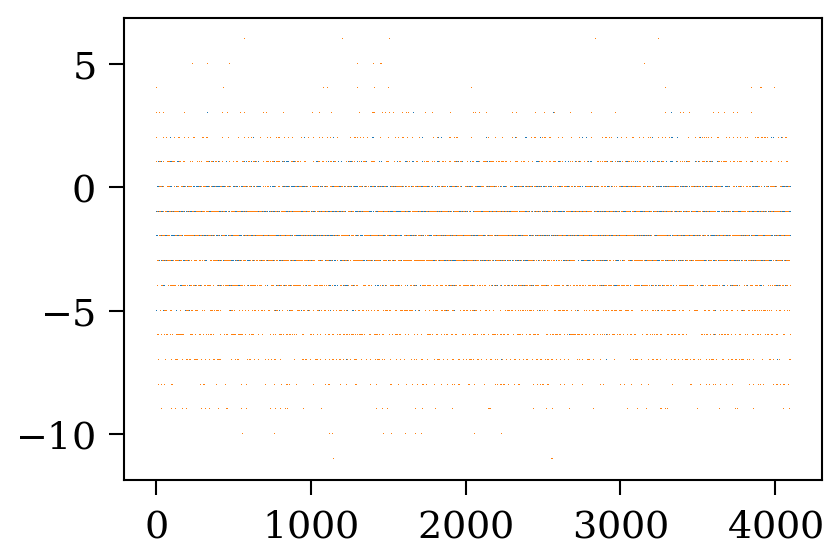

In [8]:
fig, ax = plt.subplots()
ax.plot(snaps[0].x, ',')
ax.plot(snaps[0].y, ',')

# Scan

In [9]:
scan = npd.Scan0

In [10]:
def remove_background(f, s21, amp_degree=4, phi_degree=4, weights=None):
    if weights is None:
        weights = np.abs(s21)**2
    amp_poly = np.polyfit(f, np.abs(s21), deg=amp_degree, w=weights)
    phi_poly = np.polyfit(f, np.unwrap(np.angle(s21)), deg=phi_degree, w=weights)
    return s21 / (np.polyval(amp_poly, f) * np.exp(1j * np.polyval(phi_poly, f)))

# Raw data

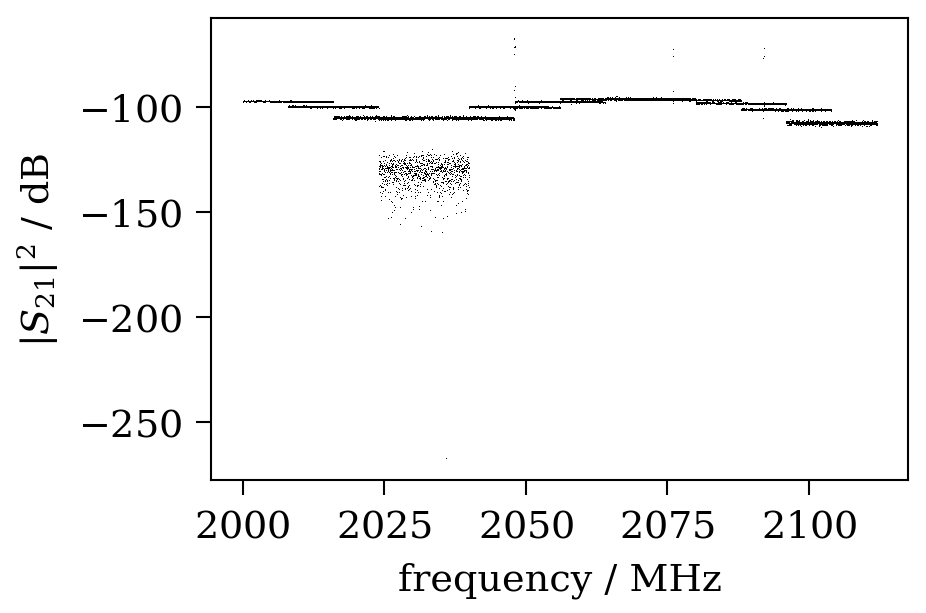

In [11]:
fig, ax = plt.subplots()
ax.set_xlabel('frequency / MHz', rotation='horizontal')
ax.set_ylabel('$|S_{21}|^2$ / dB', rotation='vertical')
ax.set_yscale('linear')
ax.set_yscale('linear')
for sa in scan.sweep_arrays:
    ax.plot(sa.frequency_MHz, 20 * np.log10(np.abs(sa.s21_point)), ',k')
ax.legend()
#ax.set_ylim()
#ax.set_xlim()
